In [6]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

Лабораторная работа №4  
Цель работы - разобраться с основами работы с нейросетями с использованием библиотеки TensorFlow, получить новые навыки и умения.  


In [7]:
df = pd.read_csv("kc_house_data.csv")
df.head

<bound method NDFrame.head of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1

In [8]:
def data_overview(df, head=5):
    print(" MISSING VALUES ".center(125,'-'))
    print(df.isnull().sum())
    print(" DUPLICATED VALUES ".center(125,'-'))
    print(df.duplicated().sum())
    print(" DATA TYPES ".center(125,'-'))
    print(df.dtypes)

data_overview(df)

------------------------------------------------------- MISSING VALUES ------------------------------------------------------
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
----------------------------------------------------- DUPLICATED VALUES -----------------------------------------------------
0
--------------------------------------------------------- DATA TYPES --------------------------------------------------------
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfro

Создание матрицы корреляции и выбор показателей

In [9]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\kanze\AppData\Local\Temp\ipykernel_17900\3784545759.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [10]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Выбираем показатели для модели:

In [11]:
x = df[['sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition','yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_lot15']]
y= df['price']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=17)

In [13]:
print(
    "Using %d samples for training and %d for validation"
    % (len(x_train), len(x_test))
)

Using 16209 samples for training and 5404 for validation


In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="linear")
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3), loss='mse', metrics=[ 'mae'])

# lr_cb = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * (10**(epoch/15)))

In [15]:
# history = model.fit(x_train, y_train, epochs=7, verbose=1, callbacks=[lr_cb])
history = model.fit(x_train, y_train, epochs=10, verbose=1)

Epoch 1/10


507/507 [==============================] - 2s 2ms/step - loss: 130881134592.0000 - mae: 230888.9219
Epoch 2/10
507/507 [==============================] - 1s 2ms/step - loss: 85402648576.0000 - mae: 189134.7500
Epoch 3/10
507/507 [==============================] - 1s 2ms/step - loss: 64067600384.0000 - mae: 169214.6562
Epoch 4/10
507/507 [==============================] - 1s 2ms/step - loss: 61450907648.0000 - mae: 167011.8750
Epoch 5/10
507/507 [==============================] - 1s 2ms/step - loss: 60177682432.0000 - mae: 165140.2969
Epoch 6/10
507/507 [==============================] - 1s 2ms/step - loss: 59936129024.0000 - mae: 164608.3750
Epoch 7/10
507/507 [==============================] - 1s 2ms/step - loss: 59494457344.0000 - mae: 163934.0312
Epoch 8/10
507/507 [==============================] - 1s 2ms/step - loss: 58344951808.0000 - mae: 162814.1406
Epoch 9/10
507/507 [==============================] - 1s 2ms/step - loss: 57575522304.0000 - mae: 162295.0781
Epoch 1

<Axes: >

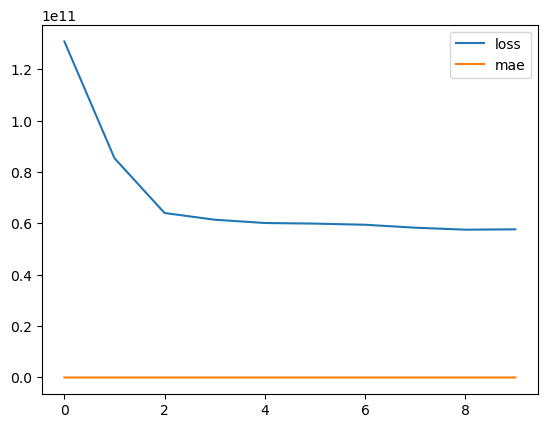

In [16]:
# Создаем датафрейм из истории обучения
hist = pd.DataFrame(history.history)

# Строим график
hist.plot()

Исходя из вывода и графика видно, что значение функции потерь уменьшается с каждой эпохой, что говорит о том, что модель обучается и улучшает свою производительность. Значение средней абсолютной ошибки также уменьшается, что указывает на то, что предсказания модели становятся ближе к фактическим значениям.

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

model.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-3),  metrics=[ 'mae'])

# lr_cb = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * (10**(epoch/15)))

In [18]:
history = model.fit(x_train, y_train, epochs=10, verbose=1)

Epoch 1/10
507/507 [==============================] - 1s 1ms/step - loss: 176387309568.0000 - mae: 273451.7188
Epoch 2/10
507/507 [==============================] - 1s 1ms/step - loss: 125713711104.0000 - mae: 225115.9531
Epoch 3/10
507/507 [==============================] - 1s 1ms/step - loss: 121482592256.0000 - mae: 221433.2656
Epoch 4/10
507/507 [==============================] - 1s 1ms/step - loss: 116604149760.0000 - mae: 217351.6250
Epoch 5/10
507/507 [==============================] - 1s 1ms/step - loss: 109325107200.0000 - mae: 211126.3281
Epoch 6/10
507/507 [==============================] - 1s 1ms/step - loss: 98684035072.0000 - mae: 199567.8125
Epoch 7/10
507/507 [==============================] - 1s 1ms/step - loss: 84049682432.0000 - mae: 183248.0312
Epoch 8/10
507/507 [==============================] - 1s 1ms/step - loss: 71900479488.0000 - mae: 170348.1406
Epoch 9/10
507/507 [==============================] - 1s 1ms/step - loss: 65614835712.0000 - mae: 164958.5156
Epoch

In [19]:
model.save("house.h5")

c:\Users\kanze\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
model = keras.models.load_model("house.h5")

In [21]:
from sklearn.metrics import *

In [27]:
y_pred_NN = np.round(model.predict(x_test)[:, 0])


169/169 [==============================] - 0s 1ms/step


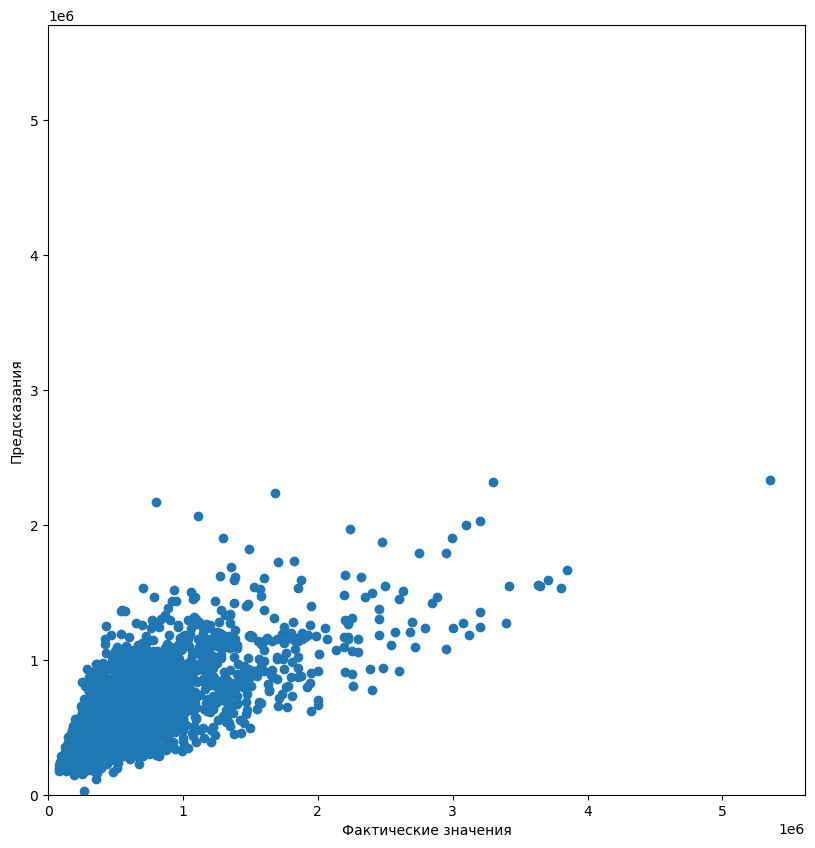

In [35]:
#Строим график рассеяния (scatter plot)
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказания')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

plt.show()

Интерпретация

График показывает, что модель справляется с предсказанием более низких значений стоимости, но становится менее точной при предсказании более высоких значений. Это связано с тем, что в модели количество предложений жилья с заоблочно высокими ценами небольшое относительно предложений с адекватной стоимостью, поэтому модель хуже предсказывает такие значения.

Вывод:
В ходе работы, научился работать с нейросетями. Так же попробовал библиотеку tensorflow, построил графики и матрицу корреляции.